0
50
67
75
80
83
86
88
89
90
91
92
92
93
93
94
94
94
95
95
95
95
96
96
96
96
96
96
97
97
97
97
97
97
97
97
97
97
97
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
98
99
99
99
99
99
99
99
99
99
99
99
99
99
99
avg of deg:  237.5

E[T]:  1000000 




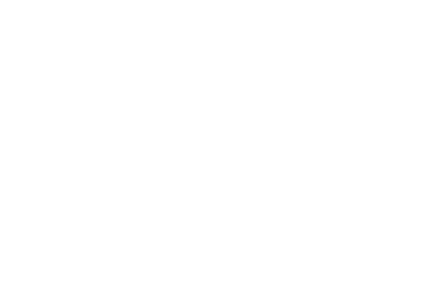

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

from networkx.algorithms.clique import number_of_cliques
# Li = 1 - ( (1 + (x/B) ) ^ (-a) )
# n = 8
# E[Li] = avarage(Li)
# array[8]

n= 80
arr_life_time = []
time = 100
E_Li = 0
alpha = 1
beta = 1


for i in range(n):
  tmp =  time * (1 - math.pow(1 + (i/beta) , (-1 * alpha) ))
  tmp = round(tmp)
  arr_life_time.append(tmp)
  print(tmp)
  E_Li += tmp

E_li = (E_Li / n)

p = 0.3

graph = nx.erdos_renyi_graph(n, p, seed=30000, directed=False)

#print(nx.is_connected(graph))
#print(E_li)

sum_degree = 0
for i in range (n):
  sum_degree = sum_degree + graph.degree[i]

print("avg of deg: ", (sum_degree/8))

#nx.draw(graph, with_labels=True)
#plt.show()


# time simulation by a for loop

arr_deleted = []
arr_t = []
arr_isolated_time = []
for i in range(n):
  arr_t.append(0)
  arr_isolated_time.append(-1)
last = -1

for time in range(101):
  # time: 0 1 2 3 4 5
  for node in range(n):
    if(time > arr_life_time[node]):
      if not (node in arr_deleted):
        #print(node)
        graph.remove_node(node)
        arr_deleted.append(node)
        last = node

  # for in n
  # degree of each edge
  # array named arr_isolated
  # if degree == 0 -> add to arr_isolated
  for node in range(n):
    if not (node in arr_deleted):
      if(graph.degree[node] == 0):
        if(arr_isolated_time[node] == -1):
          arr_isolated_time[node] = time

#print("\n",arr_isolated_time)
sum_t = 0
number_of_isolated = 0


# [-1, -1, -1, -1, -1, 100, 0, 87]

for itr in range (n):
  if(arr_isolated_time[itr] != -1):
    number_of_isolated = number_of_isolated + 1
    sum_t = sum_t + arr_isolated_time[itr]


if(number_of_isolated == 0):
  avg_t = 1000000
else:
  avg_t = sum_t / number_of_isolated



print("\nE[T]: ", avg_t, "\n\n")

#for i in range(n):
#  print(graph.degree[i+1],"\n")

nx.draw(graph, with_labels=True)
plt.show()

x : k
y : E[T]
Posibility of isolation(ϕ):  45


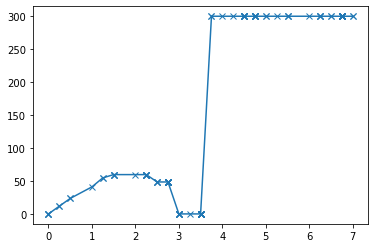

In [ ]:
# chart E[T] - k
# k: avg of degrees

from networkx.algorithms.clique import number_of_cliques

n= 8
arr_life_time = []
time = 100
E_Li = 0
alpha = 2.4
beta = 1


number_of_never_isolated = 0

# deifne 2 arrays x , y
# axis_x : k
# axis_y : E[T]
axis_x = []
axis_y = []

n = 8


for index_simulation in range(100):

  landa = 1
  arr_life_time = []

  time = 100
  E_Li = 0

  
  for i in range(8):
    tmp =  time * (1 - math.pow(1 + (i/beta) , (-1 * alpha) ))
    tmp = round(tmp)
    arr_life_time.append(tmp)
    #print(tmp)
    E_Li += tmp

  E_li = (E_Li / 8)


  p = (index_simulation / 100)

  graph = nx.erdos_renyi_graph(n, p, seed=25000, directed=False)


  sum_degree = 0
  for i in range (8):
    sum_degree = sum_degree + graph.degree[i]

  # print("avg of deg: ", (sum_degree/8))
  axis_x.append((sum_degree/8))


# time simulation by a for loop

  arr_deleted = []
  arr_t = [0,0,0,0,0,0,0,0]
  arr_isolated_time = [-1,-1,-1,-1,-1,-1,-1,-1]
  last = -1

  for time in range(101):
    # time: 0 1 2 3 4 5
    for node in range(n):
      if(time > arr_life_time[node]):
        if not (node in arr_deleted):
          #print(node)
          graph.remove_node(node)
          arr_deleted.append(node)
          last = node

    # for in n
    # degree of each edge
    # array named arr_isolated
    # if degree == 0 -> add to arr_isolated
    for node in range(n):
      if not (node in arr_deleted):
        if(graph.degree[node] == 0):
          if(arr_isolated_time[node] == -1):
            arr_isolated_time[node] = time


  sum_t = 0
  number_of_isolated = 0

  # [-1, -1, -1, -1, -1, 100, 0, 87]

  for itr in range (n):
    if(arr_isolated_time[itr] != -1):
      number_of_isolated = number_of_isolated + 1
      sum_t = sum_t + arr_isolated_time[itr]



  if(number_of_isolated == 0):
    avg_t = 3 * time
    number_of_never_isolated = number_of_never_isolated + 1
    
  else:
    avg_t = sum_t / number_of_isolated


  axis_y.append(avg_t)
  #print("\nE[T]: ", avg_t, "\n\n")

# end of main loop
print("x : k")
print("y : E[T]")
print("Posibility of isolation(ϕ): ", number_of_never_isolated)
plt.plot(axis_x, axis_y, marker='x')


x : alpha
y : E[T]



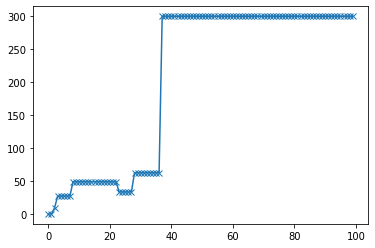

In [ ]:
# chart:  x: alpha   y: E[T]

n= 8
arr_life_time = []
time = 100
E_Li = 0
beta = 1


for alpha in range(1,100):

  for i in range(8):
    tmp =  time * (1 - math.pow(1 + (i/beta) , (-1 * alpha) ))
    tmp = round(tmp)
    arr_life_time.append(tmp)
    E_Li += tmp

  E_li = (E_Li / 8)

  p = 0.3

  graph = nx.erdos_renyi_graph(n, p, seed=30000, directed=False)


  # time simulation by a for loop

  arr_deleted = []
  arr_t = [0,0,0,0,0,0,0,0]
  arr_isolated_time = [-1,-1,-1,-1,-1,-1,-1,-1]
  last = -1

  for time in range(101):
    # time: 0 1 2 3 4 5
    for node in range(n):
      if(time > arr_life_time[node]):
        if not (node in arr_deleted):
          graph.remove_node(node)
          arr_deleted.append(node)
          last = node

    # for in n
    # degree of each edge
    # array named arr_isolated
    # if degree == 0 -> add to arr_isolated
    for node in range(n):
      if not (node in arr_deleted):
        if(graph.degree[node] == 0):
          if(arr_isolated_time[node] == -1):
            arr_isolated_time[node] = time

  #print("\n",arr_isolated_time)
  sum_t = 0
  number_of_isolated = 0


  for itr in range (n):
    if(arr_isolated_time[itr] != -1):
      number_of_isolated = number_of_isolated + 1
      sum_t = sum_t + arr_isolated_time[itr]


  if(number_of_isolated == 0):
    avg_t = 1000000
  else:
    avg_t = sum_t / number_of_isolated


  # chart E[T] - k
  # k: avg of degrees

  # deifne 2 arrays x , y
  # axis_x : alpha
  # axis_y : E[T]
  axis_x = []
  axis_y = []

  n = 8


  for index_simulation in range(100):

    landa = 1
    arr_life_time = []

    time = 100
    E_Li = 0

    for i in range(n):
      tmp =  time * (1 - math.exp((-1 * landa * (i+1))))
      tmp = round(tmp)
      arr_life_time.append(tmp)
      E_Li += tmp

    E_li = (E_Li / 8)


    p = (index_simulation / 100)

    graph = nx.erdos_renyi_graph(n, p, seed=30000, directed=False)


  # time simulation by a for loop

    arr_deleted = []
    arr_t = [0,0,0,0,0,0,0,0]
    arr_isolated_time = [-1,-1,-1,-1,-1,-1,-1,-1]
    last = -1

    for time in range(101):
      # time: 0 1 2 3 4 5
      for node in range(n):
        if(time > arr_life_time[node]):
          if not (node in arr_deleted):
            #print(node)
            graph.remove_node(node)
            arr_deleted.append(node)
            last = node

      # for in n
      # degree of each edge
      # array named arr_isolated
      # if degree == 0 -> add to arr_isolated
      for node in range(n):
        if not (node in arr_deleted):
          if(graph.degree[node] == 0):
            if(arr_isolated_time[node] == -1):
              arr_isolated_time[node] = time


    sum_t = 0
    number_of_isolated = 0


    for itr in range (n):
      if(arr_isolated_time[itr] != -1):
        number_of_isolated = number_of_isolated + 1
        sum_t = sum_t + arr_isolated_time[itr]


    if(number_of_isolated == 0):
      avg_t = 3 * time
    else:
      avg_t = sum_t / number_of_isolated

    axis_y.append(avg_t)

  #axis_x.append(alpha)
    #print("\nE[T]: ", avg_t, "\n\n")

# end of main loop

for kk in range(100):
  axis_x.append(kk)


print("x : alpha")
print("y : E[T]\n")

plt.plot(axis_x, axis_y, marker='x')

x : k
y : E[T]
Posibility of isolation(ϕ):  2


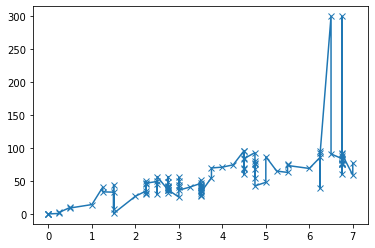

In [ ]:
# Check the affection of alpha on the possibilty of isolation (ϕ) 
# for loop in each node: if degree of node is zero -> isolated

# chart E[T] - k
# k: avg of degrees

from networkx.algorithms.clique import number_of_cliques
from random import randint

n= 8
arr_life_time = []
time = 100
E_Li = 0
alpha = 3
beta = 1


number_of_never_isolated = 0

# deifne 2 arrays x , y
# axis_x : k
# axis_y : E[T]
axis_x = []
axis_y = []

n = 8


for index_simulation in range(100):

  landa = 1
  arr_life_time = []

  time = 100
  E_Li = 0

  
  for i in range(8):
    #tmp =  time * (1 - math.pow(1 + (i/beta) , (-1 * alpha) ))
    #tmp = round(tmp)
    tmp = randint(0,100)
    arr_life_time.append(tmp)
    #print(tmp)
    E_Li += tmp

  E_li = (E_Li / 8)


  p = (index_simulation / 100)

  graph = nx.erdos_renyi_graph(n, p, seed=25000, directed=False)


  sum_degree = 0
  for i in range (8):
    sum_degree = sum_degree + graph.degree[i]

  # print("avg of deg: ", (sum_degree/8))
  axis_x.append((sum_degree/8))


# time simulation by a for loop

  arr_deleted = []
  arr_t = [0,0,0,0,0,0,0,0]
  arr_isolated_time = [-1,-1,-1,-1,-1,-1,-1,-1]
  last = -1

  for time in range(101):
    # time: 0 1 2 3 4 5
    for node in range(n):
      if(time > arr_life_time[node]):
        if not (node in arr_deleted):
          #print(node)
          graph.remove_node(node)
          arr_deleted.append(node)
          last = node

    # for in n
    # degree of each edge
    # array named arr_isolated
    # if degree == 0 -> add to arr_isolated
    for node in range(n):
      if not (node in arr_deleted):
        if(graph.degree[node] == 0):
          if(arr_isolated_time[node] == -1):
            arr_isolated_time[node] = time


  sum_t = 0
  number_of_isolated = 0

  # [-1, -1, -1, -1, -1, 100, 0, 87]

  for itr in range (n):
    if(arr_isolated_time[itr] != -1):
      number_of_isolated = number_of_isolated + 1
      sum_t = sum_t + arr_isolated_time[itr]



  if(number_of_isolated == 0):
    avg_t = 3 * time
    number_of_never_isolated = number_of_never_isolated + 1
    
  else:
    avg_t = sum_t / number_of_isolated


  axis_y.append(avg_t)
  #print("\nE[T]: ", avg_t, "\n\n")

# end of main loop
print("x : k")
print("y : E[T]")
print("Posibility of isolation(ϕ): ", number_of_never_isolated)
plt.plot(axis_x, axis_y, marker='x')


In [ ]:
# Check the affection of alpha on E[T]


